# Rhythm Makers

In [1]:
from abjad import *
%load_ext abjad.ext.ipython
%cd /Users/josephdavancens/git/surge
from surge import *
from surge.materials.segment_1 import *

/Users/josephdavancens/git/surge


In [2]:
stage_1 = time_signatures[0][0]
flat = sequencetools.flatten_sequence(stage_1)
print('Number of measures:',len(flat))
groups = [3,2,4,3,4]
for group in sequencetools.partition_sequence_by_counts(stage_1, groups):
    print(len(group),group)

('Number of measures:', 16)
(3, (TimeSignature((3, 4)), TimeSignature((2, 4)), TimeSignature((5, 8))))
(2, (TimeSignature((3, 8)), TimeSignature((5, 8))))
(4, (TimeSignature((2, 4)), TimeSignature((2, 4)), TimeSignature((3, 8)), TimeSignature((5, 8))))
(3, (TimeSignature((2, 4)), TimeSignature((5, 8)), TimeSignature((3, 8))))
(4, (TimeSignature((5, 8)), TimeSignature((3, 8)), TimeSignature((2, 4)), TimeSignature((3, 8))))


# Incised Rhythm Maker

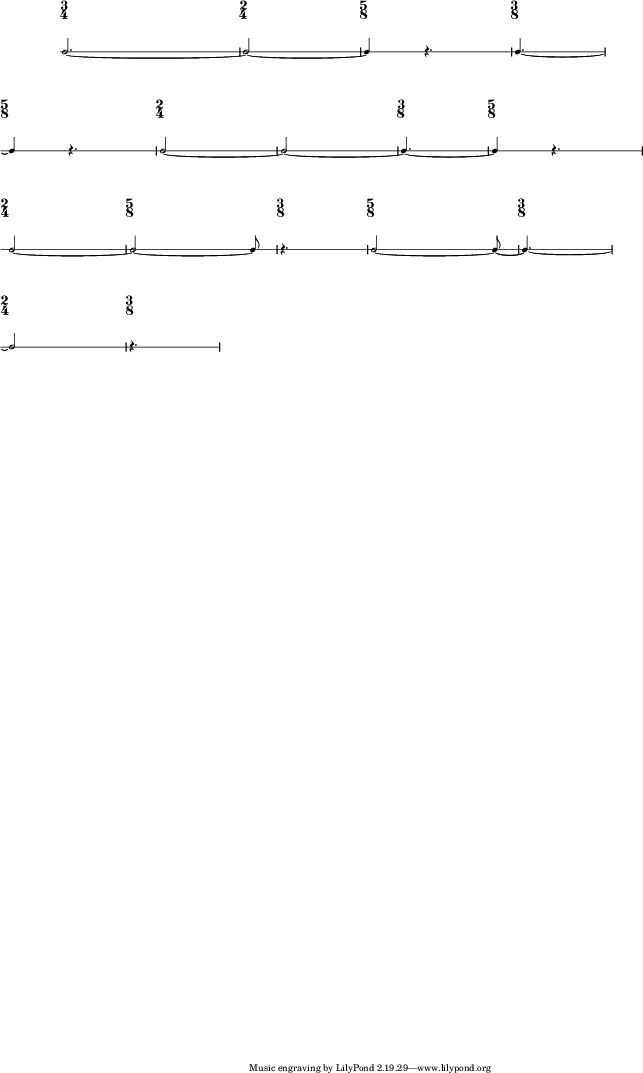

In [3]:
maker = rhythmmakertools.IncisedRhythmMaker(
    incise_specifier=rhythmmakertools.InciseSpecifier(
        prefix_talea=[0],
        prefix_counts=[1],
        suffix_talea=[-3],
        suffix_counts=[1],
        talea_denominator=8,
        outer_divisions_only=True
    ),
    tie_specifier=rhythmmakertools.TieSpecifier(tie_across_divisions=True),
)
music = []
for group in sequencetools.partition_sequence_by_counts(stage_1, groups):
    incision = maker(group)
    music.extend(incision)
lpf = rhythmmakertools.make_lilypond_file(music, stage_1)
show(lpf)

# Talea Rhythm Maker

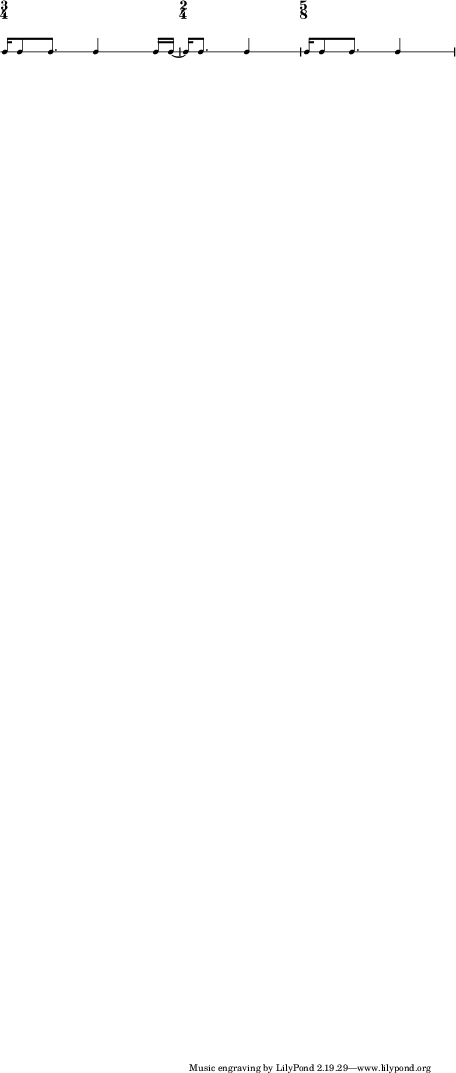

In [4]:
talea  = rhythmmakertools.Talea(
    counts=[1,2,3,4],
    denominator=16
    )
maker = rhythmmakertools.TaleaRhythmMaker(
    talea=talea,
)
music = maker(stage_1[0:3])
lpf = rhythmmakertools.make_lilypond_file(music, stage_1[0:3])
show(lpf)

# Tuplet Rhythm Maker

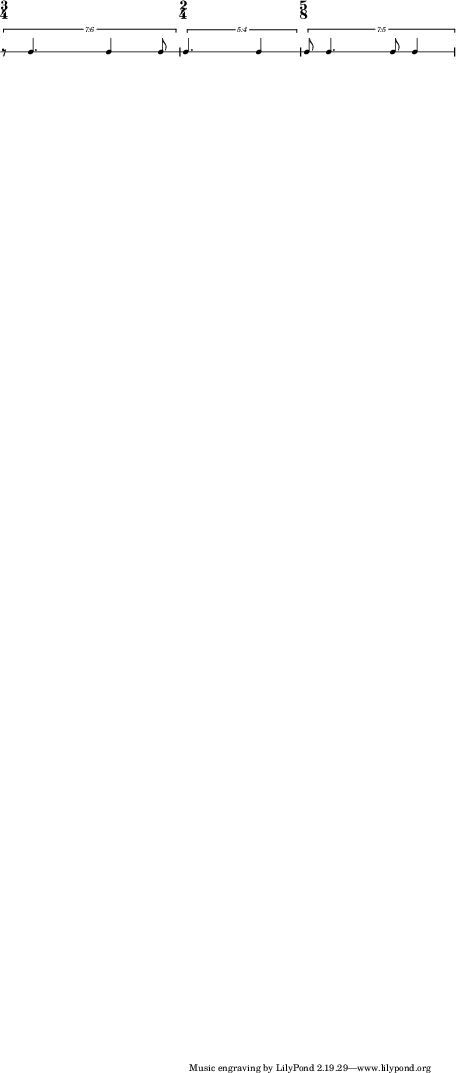

In [5]:
tuplet_spelling_specifier = rhythmmakertools.TupletSpellingSpecifier(
    avoid_dots=True,
    flatten_trivial_tuplets=True,
    is_diminution=True,
    simplify_tuplets=True,
)
maker = rhythmmakertools.TupletRhythmMaker(
    tuplet_ratios=[(-1,3,2,1),(3,2),(1,3,1,2)],
    tuplet_spelling_specifier=tuplet_spelling_specifier,
)
music = maker(stage_1[0:3])
lpf = rhythmmakertools.make_lilypond_file(music, stage_1[0:3])
show(lpf)

# 